In [1]:
from numpy import float32, uint8, ceil
from numpy import array, zeros, arange, pad, concatenate, linspace
from numpy import sin, cos, pi, absolute, angle, outer, dot, min, max, log, log2, real, imag, std, sum, sqrt, exp, clip
from numpy import logical_or
from numpy import allclose, load
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from IPython.display import Audio
import random
import csv

nsamples = 256

In [2]:
def complexExp(x : float32):
    arg = 2 * pi * x 
    return cos(arg) + 1j * sin(arg)

In [3]:
def DFT(inSignal : complex, s : int = -1): 
    y = zeros(inSignal.shape, dtype=complex)
    
    # Hint 0: Use the complexExp function
    N = inSignal.size

    for x in range(0, N):
        for k in range(0, N):
            y[x] = y[x] + inSignal[k] * complexExp((s * k * x) / N )
    
    return y

In [4]:
def generate_signal():
    nperiod = 1
    sampling_time_rad = nperiod * 2 * pi 
    
    t_resolution_rad = sampling_time_rad / nsamples
    
    signal = zeros(nsamples)
    
    for i in range(0, nsamples):
        t_rad = i * t_resolution_rad
        
        signal[i] = cos(150 * t_rad)
#         signal[i] = 5 + 4*cos(2 * t_rad) + 2*cos(8 * t_rad - pi/2) + 3*cos(32 * t_rad + pi/2)
        
    return signal

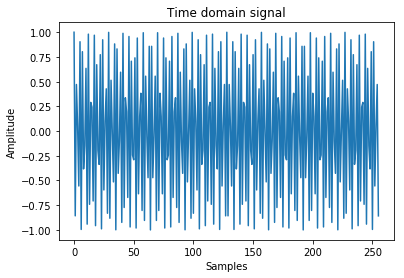

In [5]:
time_signal = generate_signal()

plt.plot(time_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time domain signal')
plt.show()

In [6]:
freq_signal = DFT(time_signal)

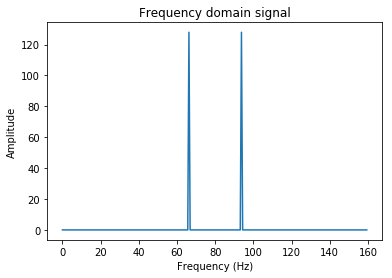

In [7]:
T = 2.0
t = arange(0, T*80, T*80/nsamples )

plt.plot(t,absolute(freq_signal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain signal')
plt.show()

In [8]:
def FFT(inSignal : complex, s : int = -1):
    N = inSignal.size
    output = zeros(N, dtype=complex)
    
    # Ensure that N has power-of-2 length
    try:
        assert((N & (N - 1) == 0) and N != 0)
    except:
        raise Exception("N is not a power-of-two!")
    
    # Recursively compute the FFT
    
    # Base case (see the note below on optionally modifying this case)
    if N == 1:
        return inSignal
    
    f_e_bar = FFT(inSignal[::2], s)
    f_o_bar = FFT(inSignal[1::2], s)
    
    w = complexExp(s * arange(N) / N)
    
    output = concatenate([f_e_bar + w[: int(N / 2)] * f_o_bar,
                               f_e_bar + w[int(N / 2) :] * f_o_bar])
    
    return output

In [9]:
freq_signal = FFT(time_signal)

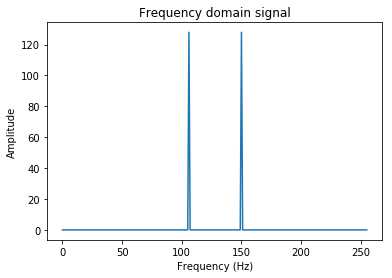

In [10]:
T = 2.0
t = arange(0, T*80, T*80/nsamples )

plt.plot(absolute(freq_signal))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain signal')
plt.show()